In [27]:
from PIL import Image, ImageDraw
import easygui
import os
from tqdm import tqdm
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import polars as pl
import ast

In [28]:
RIADD_ODIR = 0 # =0 pour les stat su RIADD, =1 pour ODIR
if RIADD_ODIR == 1:
    label_path = "C:/Users/joshu/Desktop/Cours IMT/2A/Commande entreprise/Base de données/ODIR/training_set.xlsx"
    path_image_244 = "C:/Users/joshu/Desktop/Cours IMT/2A/Commande entreprise/Base de données/ODIR/Images_train/Images 244 244"
    df_pandas = pd.read_excel(label_path)
    # Convertir le DataFrame pandas en DataFrame polars
    df = pl.from_pandas(df_pandas)
    Fundus = df["Fundus"]
    Vector = df["Vector"]
if RIADD_ODIR == 0:
    label_path ="C:/Users/joshu/Desktop/Cours IMT/2A/Commande entreprise/Base de données/RIADD/RFMiD_Training.csv"
    path_image_244 = "C:/Users/joshu/Desktop/Cours IMT/2A/Commande entreprise/Base de données/RIADD/Training/Training 244"
    df = pd.read_csv(label_path)
    Fundus = df["ID"]
    N = df["N"]
    D = df["D"]
    G = df["G"]
    C = df["C"]
    A = df["A"]
    H = df["H"]
    M = df["M"]
    O = df["O"]
    Vector = [[N[i],D[i],G[i],C[i],A[i],H[i],M[i],O[i]] for i in range(len(Fundus))]
n=len(Fundus)
nb_patho = [0,0,0,0,0,0,0,0]
Patho = ["N","D","G","C","A","H","M","O"]
MoyenneR = [[],[],[],[],[],[],[],[]]
MoyenneG = [[],[],[],[],[],[],[],[]]
MoyenneB = [[],[],[],[],[],[],[],[]]
Intensité = [[],[],[],[],[],[],[],[]]
def trouve_le_1(vect):
    for i in range(8):
        if vect[i] == 1:
            return i
    return -1

In [29]:
for i in tqdm(range(n), desc="Traitement des images"):
    if RIADD_ODIR == 1:
        # Séparer le nom de fichier de son extension
        base_name, ext = os.path.splitext(Fundus[i])
    
        # Construire le chemin de l'image avec le suffixe _244 avant l'extension
        chemin_image = os.path.join(path_image_244, f"{base_name}_244.jpg")
        image = Image.open(chemin_image)
        image_np = np.array(image)
        I = 0
        v = ast.literal_eval(Vector[i])
    if RIADD_ODIR == 0:
        # Construire le chemin de l'image avec le suffixe _244 avant l'extension
        chemin_image = os.path.join(path_image_244, f"{Fundus[i]}_244.jpg")
        image = Image.open(chemin_image)
        image_np = np.array(image)
        I = 0
        v = Vector[i]
    # Masque pour ignorer les pixels noirs
    masque = np.all(image_np != [0, 0, 0], axis=-1)

    # Sélectionner les pixels non noirs
    pixels_non_noirs = image_np[masque]

    k = trouve_le_1(v)
    nb_patho[k] += 1

    if pixels_non_noirs.size > 0:
        # Calculer la moyenne des canaux R, G, B
        moy = np.mean(pixels_non_noirs, axis=0)
        MoyenneR[k].append(moy[0])
        MoyenneG[k].append(moy[1])
        MoyenneB[k].append(moy[2])
        # Calculer l'intensité moyenne des pixels non noirs
        intensités = 0.299 * pixels_non_noirs[:, 0] + 0.587 * pixels_non_noirs[:, 1] + 0.114 * pixels_non_noirs[:, 2]
        Intensité[k].append(np.mean(intensités))
        """for pixel in pixels_non_noirs:
            intensité = 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]
            I += intensité
        Intensité[k].append(I/pixels_non_noirs.size)"""

Traitement des images:   0%|          | 0/1920 [00:00<?, ?it/s]

Traitement des images: 100%|██████████| 1920/1920 [00:17<00:00, 111.97it/s]


In [30]:
print("obtention de toutes les valeurs, calculs des moyennes")
MR = np.zeros(8)
MG = np.zeros(8)
MB = np.zeros(8)
MI = np.zeros(8)
VR = np.zeros(8)
VG = np.zeros(8)
VB = np.zeros(8)
VI = np.zeros(8)
"""MoyenneR = np.array(MoyenneR)
MoyenneG = np.array(MoyenneG)
MoyenneB = np.array(MoyenneB)
Intensité = np.array(Intensité)"""
for i in tqdm(range(8), desc="Calcul des moyennes"):
    MR[i] = np.mean(MoyenneR[i])
    MG[i] = np.mean(MoyenneG[i])
    MB[i] = np.mean(MoyenneB[i])
    MI[i] = np.mean(Intensité[i])
    VR[i] = np.var(MoyenneR[i])
    VG[i] = np.var(MoyenneG[i])
    VB[i] = np.var(MoyenneB[i])
    VI[i] = np.var(Intensité[i])

obtention de toutes les valeurs, calculs des moyennes


Calcul des moyennes: 100%|██████████| 8/8 [00:00<00:00, 843.52it/s]


In [31]:
print(np.var(np.array(MoyenneR[0])))

416.66954039293313


Pathologie N : 401 images
Moyenne R : 110.26196258998951, Moyenne G : 63.85498853962413, Moyenne B : 35.86925467817562, Intensité : 74.54030012047824
Variance R : 416.66954039293313, Variance G : 247.86356035863773, Variance B : 291.868643838476, Variance Intensité : 243.76828162162798




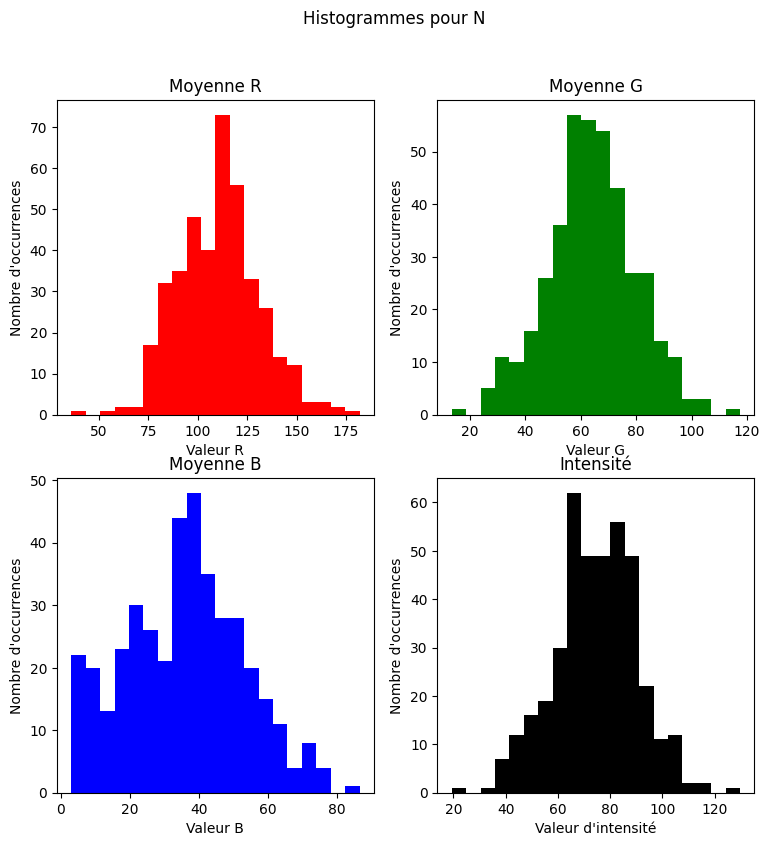

Pathologie D : 376 images
Moyenne R : 116.90784117845686, Moyenne G : 69.7908098911603, Moyenne B : 26.823136524322777, Intensité : 78.98048748224248
Variance R : 355.04429878484757, Variance G : 310.75356919864566, Variance B : 267.0796120337945, Variance Intensité : 258.07924793776834




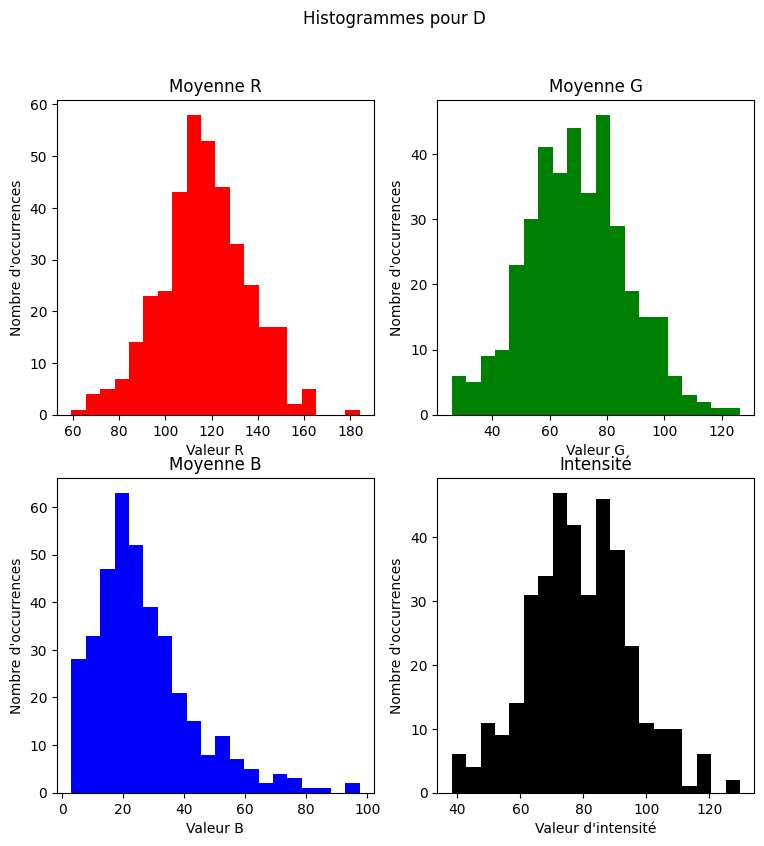

Pathologie G : 252 images
Moyenne R : 117.31386795552369, Moyenne G : 73.13905121941482, Moyenne B : 41.57421959194852, Intensité : 82.74893061798022
Variance R : 543.6416986688585, Variance G : 321.2233011951569, Variance B : 285.4928980758812, Variance Intensité : 308.5804037660453




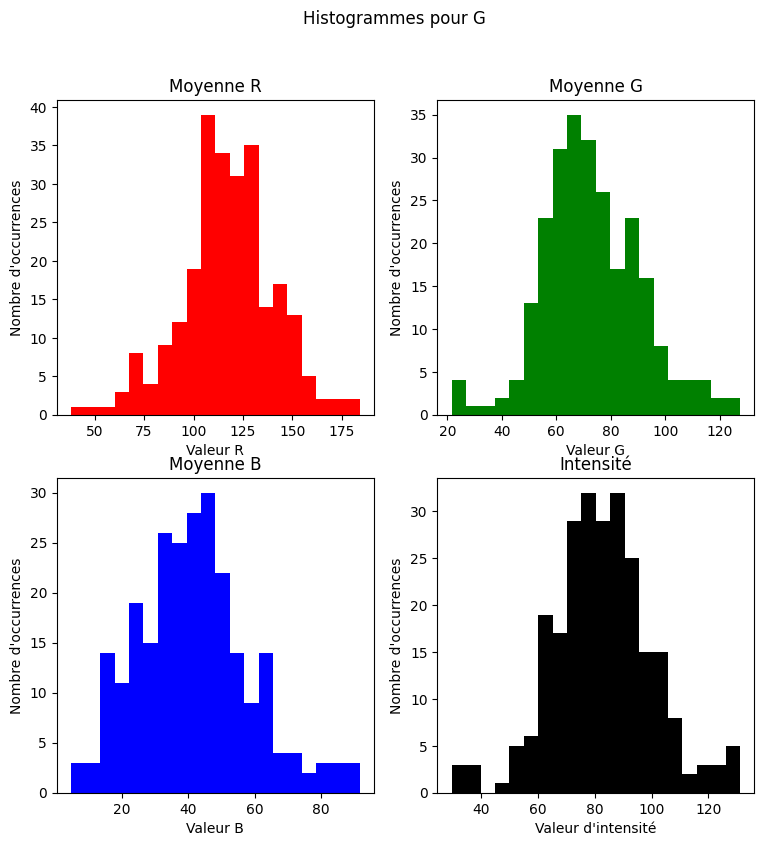

Pathologie C : 246 images
Moyenne R : 108.81481539802829, Moyenne G : 77.99696605793615, Moyenne B : 45.86386596931384, Intensité : 83.54832960052076
Variance R : 881.9648359066044, Variance G : 776.2715022324957, Variance B : 674.7720620105032, Variance Intensité : 682.6023952113679




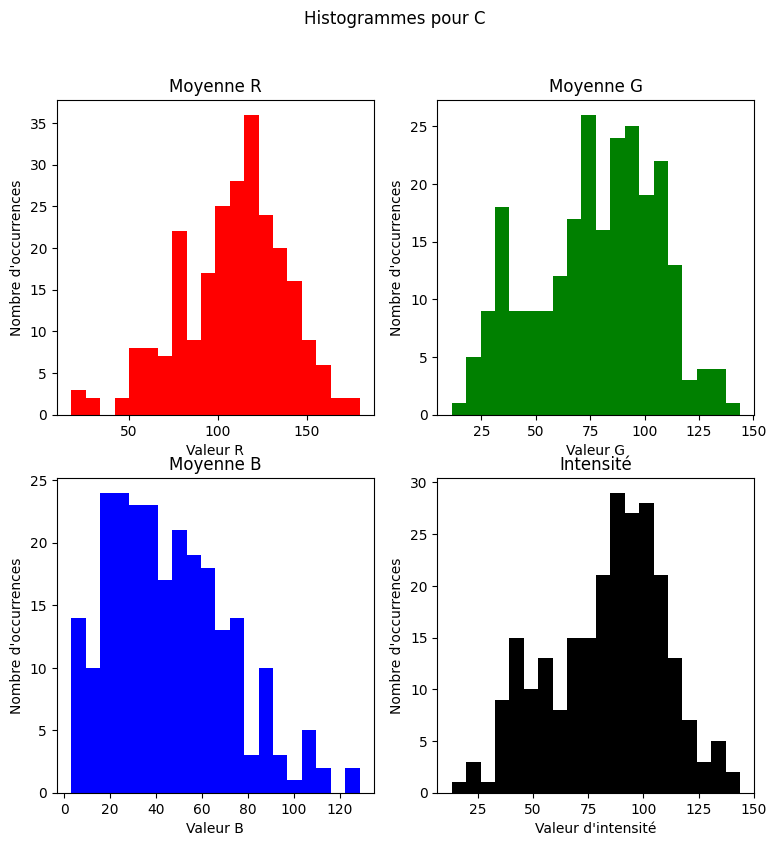

Pathologie A : 87 images
Moyenne R : 124.43132851654978, Moyenne G : 79.67155126882214, Moyenne B : 43.50894844138056, Intensité : 88.93218794356434
Variance R : 469.7028885670384, Variance G : 453.15026258726334, Variance B : 520.3574735151084, Variance Intensité : 406.0108640522277




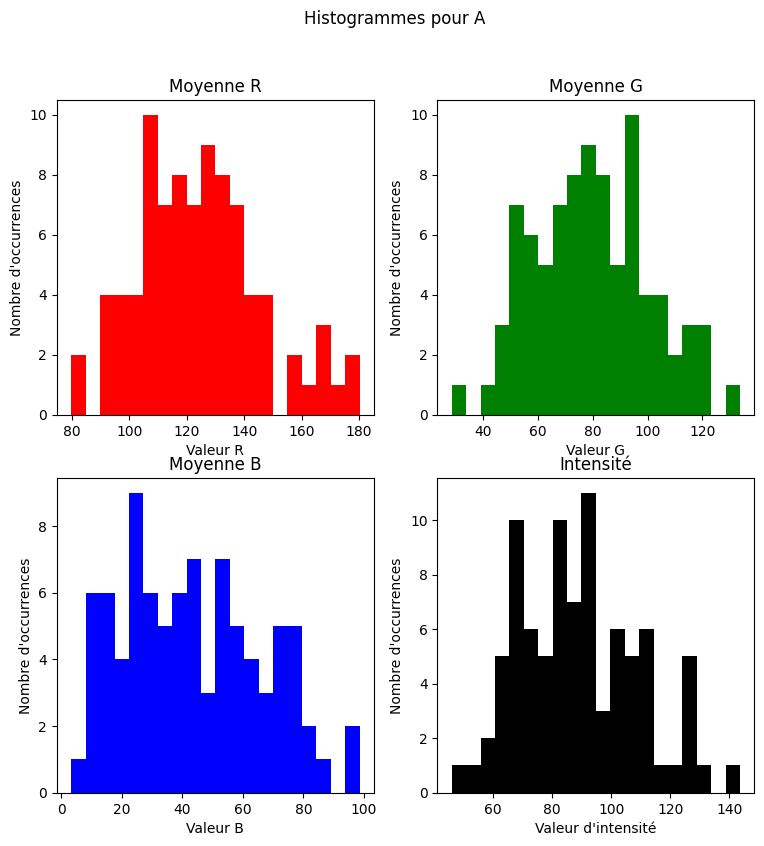

Pathologie H : 2 images
Moyenne R : 124.99178075573286, Moyenne G : 68.24371262327946, Moyenne B : 31.748272822781026, Intensité : 81.05090485762621
Variance R : 88.79071132154928, Variance G : 22.120022002298576, Variance B : 89.68361864545955, Variance Intensité : 1.046383104307204




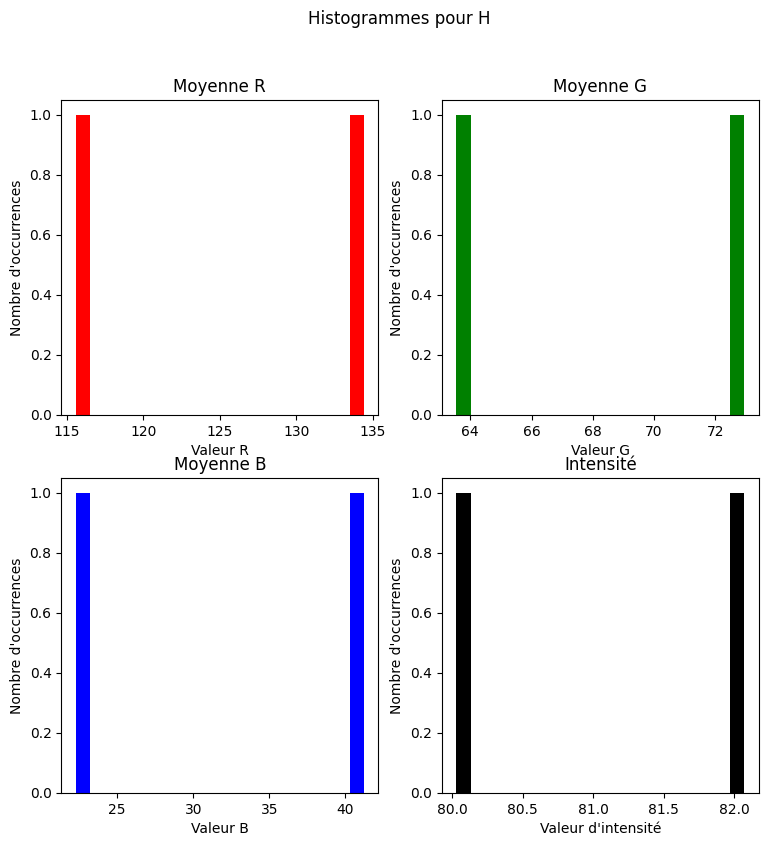

Pathologie M : 50 images
Moyenne R : 132.55525802736963, Moyenne G : 71.50750267332661, Moyenne B : 35.21530778122133, Intensité : 85.62347130648544
Variance R : 719.6924573666821, Variance G : 513.5149291062958, Variance B : 291.4450551186916, Variance Intensité : 481.87989902989693




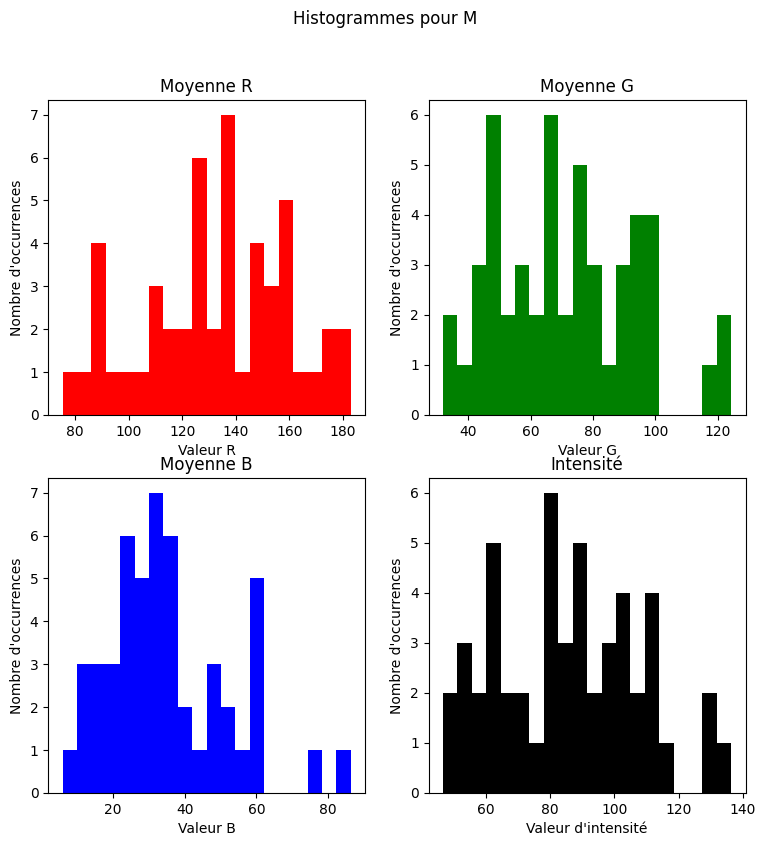

Pathologie O : 506 images
Moyenne R : 112.15975882950384, Moyenne G : 73.08052342128106, Moyenne B : 42.740240160901415, Intensité : 81.30642251665638
Variance R : 342.8092970644515, Variance G : 266.0641923696287, Variance B : 307.9247752081988, Variance Intensité : 228.08281430937393




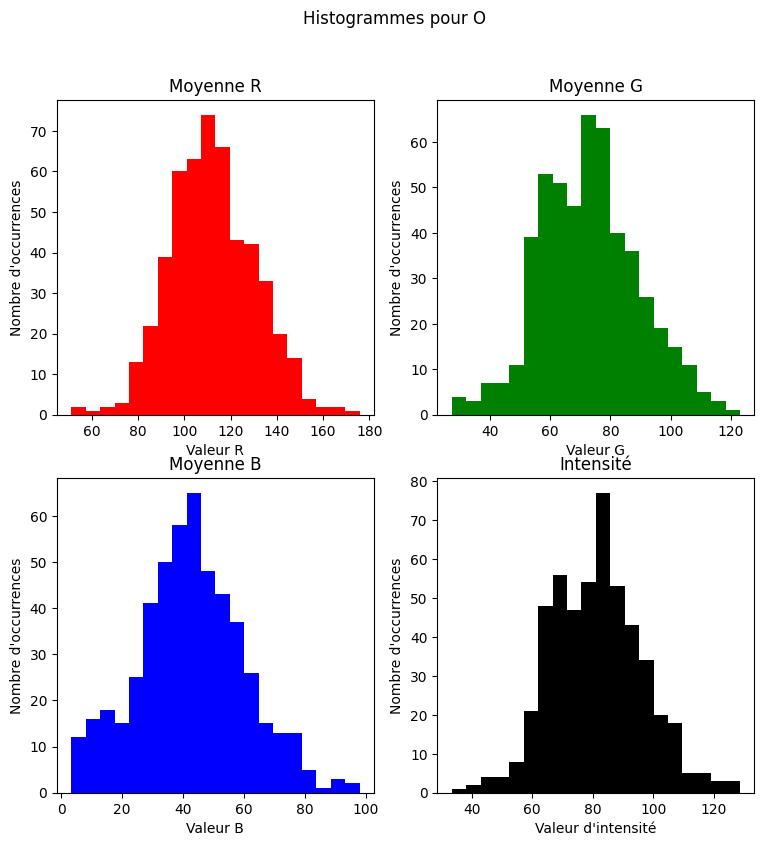

In [32]:
for i in range(8):
    print(f"Pathologie {Patho[i]} : {nb_patho[i]} images")
    print(f"Moyenne R : {MR[i]}, Moyenne G : {MG[i]}, Moyenne B : {MB[i]}, Intensité : {MI[i]}")
    print(f"Variance R : {VR[i]}, Variance G : {VG[i]}, Variance B : {VB[i]}, Variance Intensité : {VI[i]}")
    print("\n")
    plt.figure(figsize=(9, 9))
    plt.suptitle(f"Histogrammes pour {Patho[i]}")
    plt.subplot(2, 2, 1)
    plt.title("Moyenne R")
    plt.xlabel('Valeur R')
    plt.ylabel('Nombre d\'occurrences')
    plt.hist(MoyenneR[i], bins=20, color='red')
    plt.subplot(2, 2, 2)
    plt.title("Moyenne G")
    plt.xlabel('Valeur G')
    plt.ylabel('Nombre d\'occurrences')
    plt.hist(MoyenneG[i], bins=20, color='green')
    plt.subplot(2, 2, 3)
    plt.title("Moyenne B")
    plt.xlabel('Valeur B')
    plt.ylabel('Nombre d\'occurrences')
    plt.hist(MoyenneB[i], bins=20, color='blue')
    plt.subplot(2, 2, 4)
    plt.title("Intensité")
    plt.xlabel('Valeur d\'intensité')
    plt.ylabel('Nombre d\'occurrences')
    plt.hist(Intensité[i], bins=20, color='black')
    plt.show()

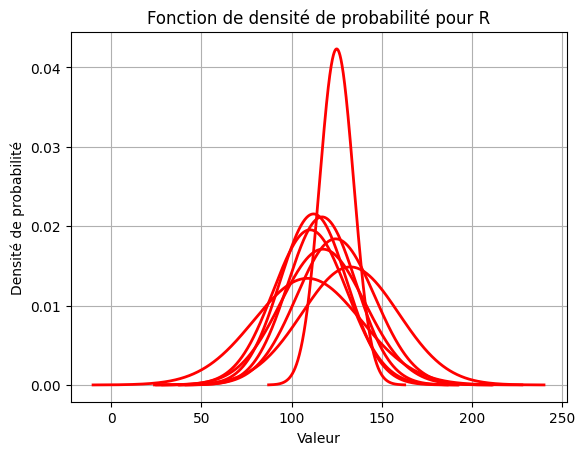

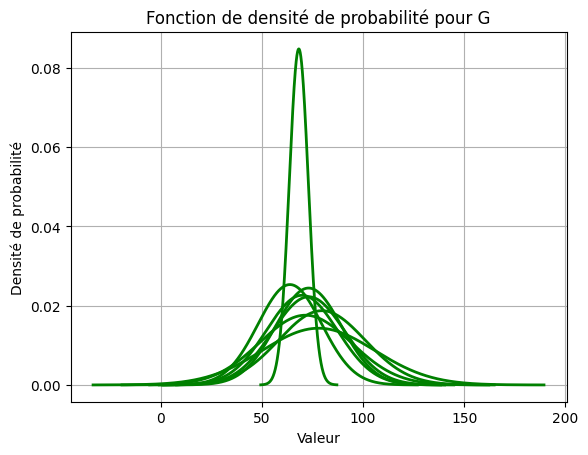

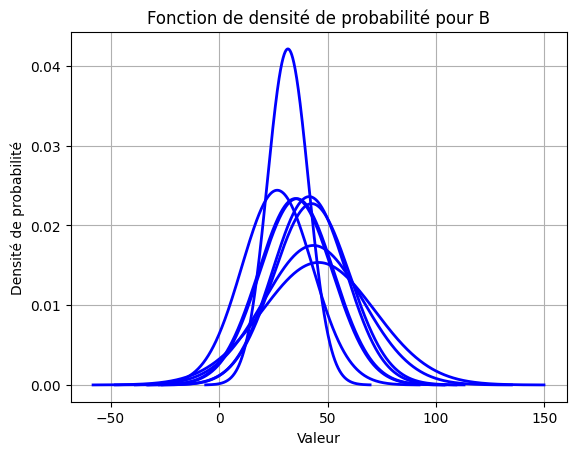

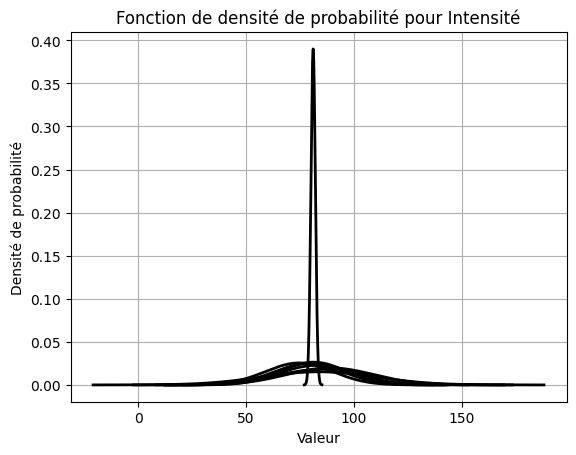

In [33]:
from scipy.stats import norm
M = [MR,MG,MB,MI]
V = [VR,VG,VB,VI]
type = ["R","G","B","Intensité"]
couleur = ["red","green","blue","black"]
for i in range(4):
    for j in range(8):
        # Paramètres de la distribution gaussienne
        mean = M[i][j]  # Moyenne
        variance = V[i][j]  # Variance
        std_dev = np.sqrt(variance)  # Écart-type

        # Générer des valeurs pour l'axe x
        x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

        # Calculer la fonction de densité de probabilité (PDF)
        pdf = norm.pdf(x, mean, std_dev)

        # Tracer la fonction de densité de probabilité
        plt.plot(x, pdf, couleur[i], linewidth=2)

    

    plt.title(f"Fonction de densité de probabilité pour {type[i]}")
    plt.xlabel("Valeur")
    plt.ylabel("Densité de probabilité")
    plt.grid(True)
    plt.show()